In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [3]:
def load_images_from_dir(dir_path):
    images = []
    for filename in os.listdir(dir_path):
        img_path = os.path.join(dir_path, filename)
        img = load_img(img_path, target_size=(150, 150))
        img_array = img_to_array(img)
        images.append(img_array)
    return np.array(images)


In [41]:
original_dir = '/kaggle/input/forest-fire-classification-dataset/ForestFireDataset(Classifications)/ForestFireDataset/train'


In [18]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def detect_fire_edges(images):
    edged_images = []
    for img in images:
        hsv = cv2.cvtColor(img.astype('uint8'), cv2.COLOR_RGB2HSV)
        lower_bound1 = np.array([0, 100, 100])
        upper_bound1 = np.array([10, 255, 255])
        lower_bound2 = np.array([160, 100, 100])
        upper_bound2 = np.array([180, 255, 255])
        mask1 = cv2.inRange(hsv, lower_bound1, upper_bound1)
        mask2 = cv2.inRange(hsv, lower_bound2, upper_bound2)
        mask = cv2.bitwise_or(mask1, mask2)
        blurred_mask = cv2.GaussianBlur(mask, (5, 5), 0)
        kernel = np.ones((5, 5), np.uint8)
        morph_mask = cv2.morphologyEx(blurred_mask, cv2.MORPH_CLOSE, kernel)
        morph_mask = cv2.dilate(morph_mask, kernel, iterations=1)
        edges = cv2.Canny(morph_mask, 100, 200)
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        edges_colored = np.zeros_like(img)
        cv2.drawContours(edges_colored, contours, -1, (0, 255, 0), 1)
        img_uint8 = img.astype('uint8')
        img_with_edges = cv2.addWeighted(img_uint8, 1, edges_colored.astype('uint8'), 0.5, 0)
        edged_images.append(img_with_edges)
    return np.array(edged_images)

fire_edge_images = detect_fire_edges(images)


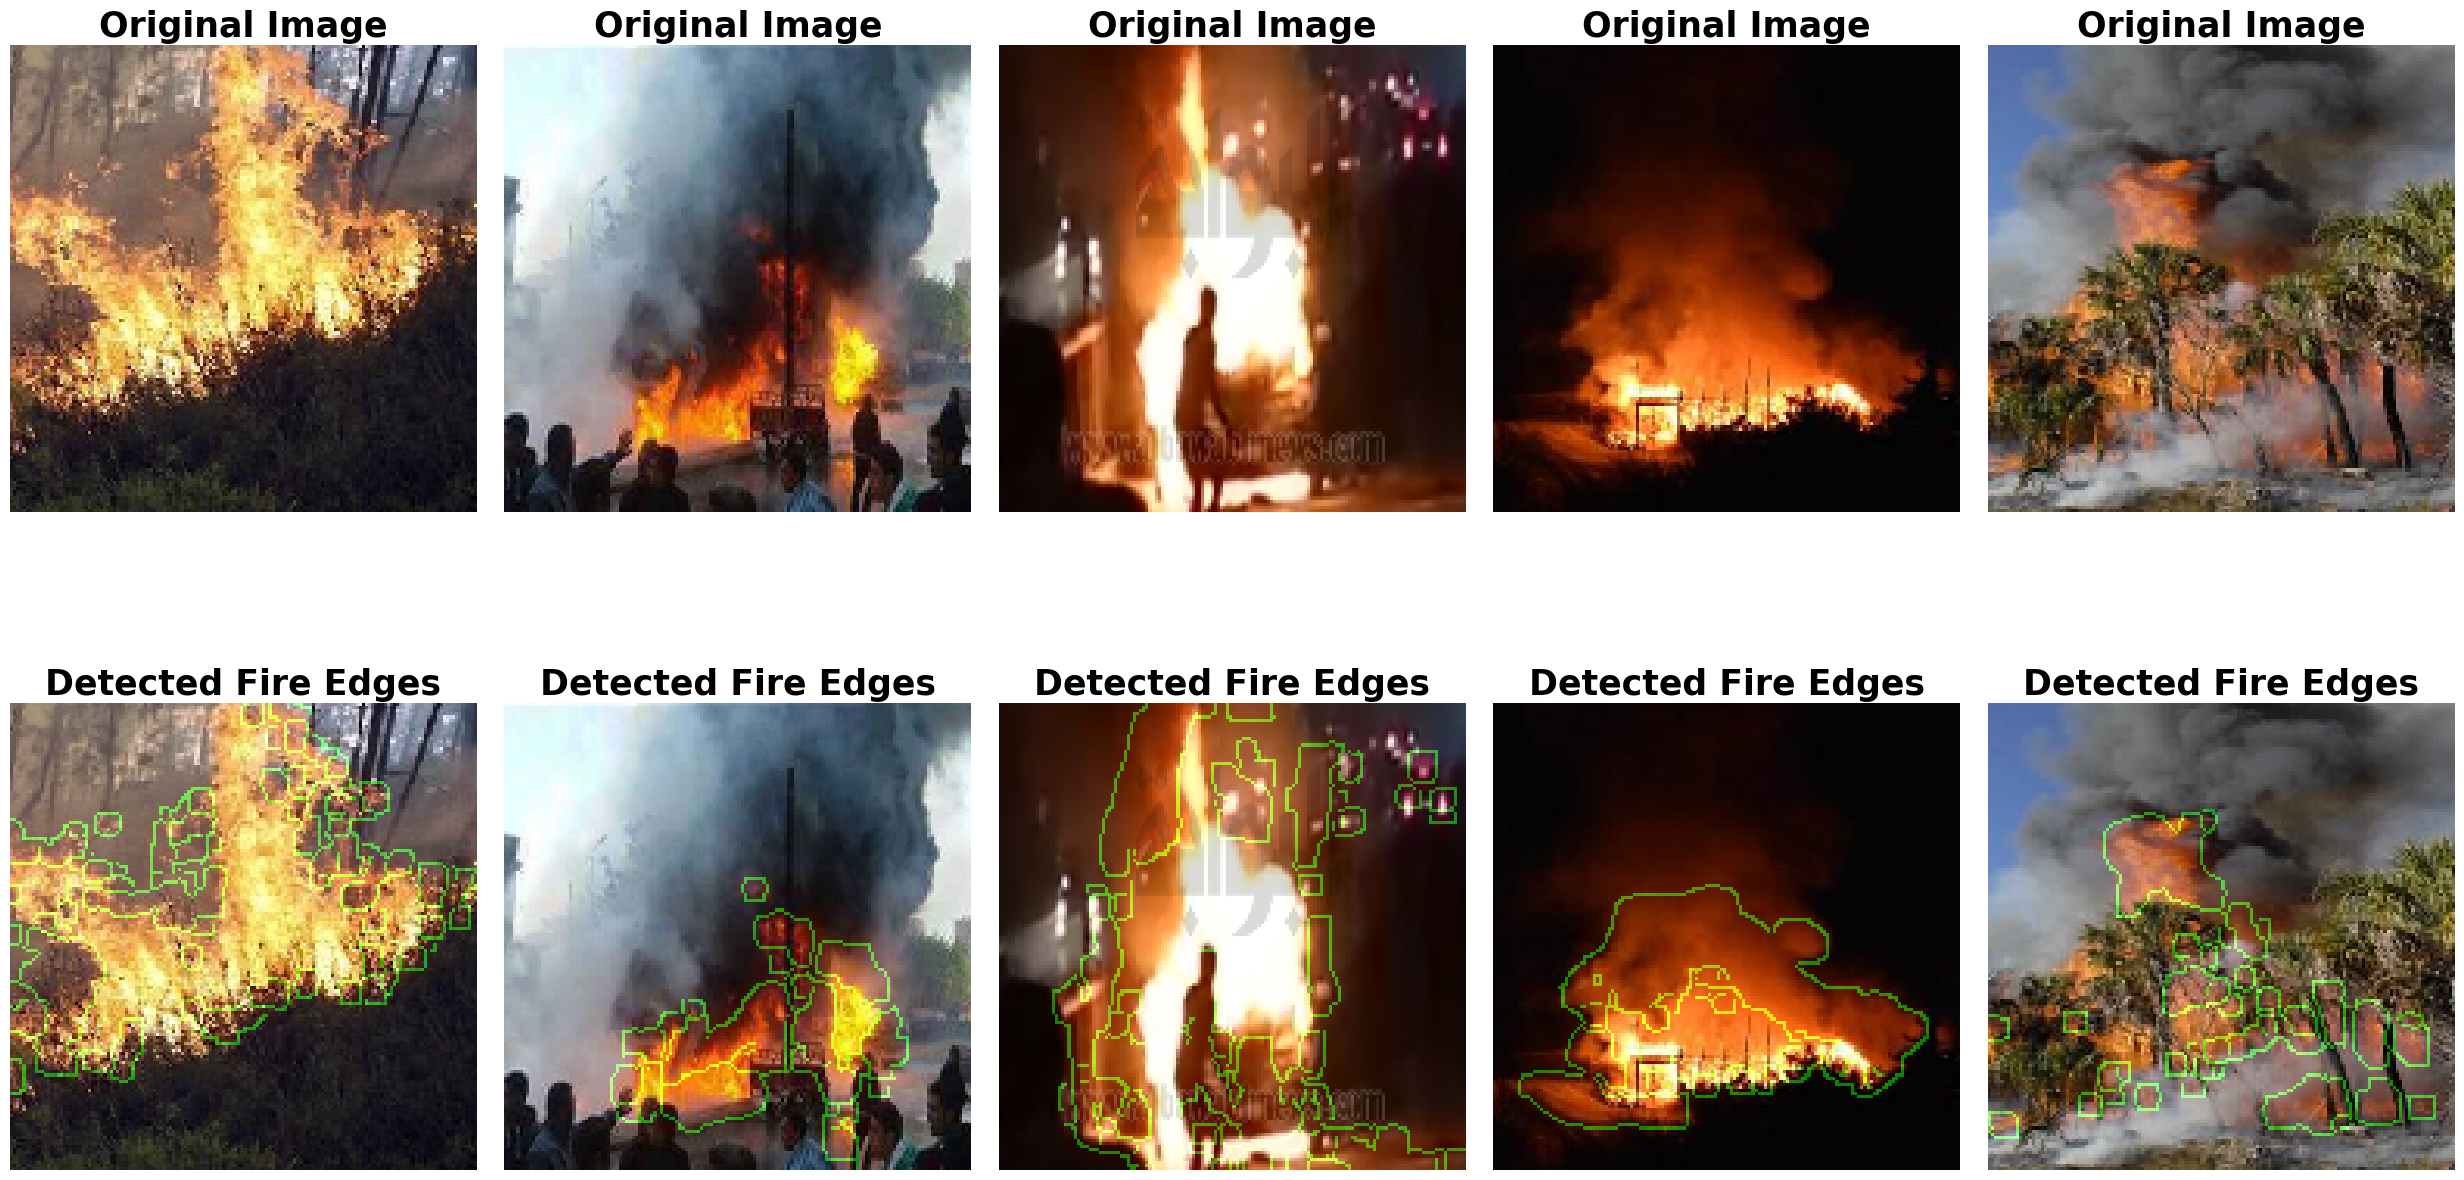

In [26]:
n = 5
plt.figure(figsize=(25, 15))

for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(images[i].astype('uint8'))
    plt.title('Original Image', fontsize=25, fontweight='bold')
    plt.axis('off')
    plt.grid(False)

    plt.subplot(2, n, i + 1 + n)
    plt.imshow(fire_edge_images[i].astype('uint8'), cmap='gray')
    plt.title('Detected Fire Edges', fontsize=25, fontweight='bold')
    plt.axis('off')
    plt.grid(False)

plt.tight_layout(pad=2)
plt.show()


In [27]:
original_dir = '/kaggle/input/effective-forest-fire/Effective Forest Fire Detection Data-set for Heterogeneous Wireless Multimedia Sensor Networks/forest_images_dataset/fire'


In [29]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def detect_fire_edges(images):
    edged_images = []
    for img in images:
        hsv = cv2.cvtColor(img.astype('uint8'), cv2.COLOR_RGB2HSV)
        lower_bound1 = np.array([0, 100, 100])
        upper_bound1 = np.array([10, 255, 255])
        lower_bound2 = np.array([160, 100, 100])
        upper_bound2 = np.array([180, 255, 255])
        mask1 = cv2.inRange(hsv, lower_bound1, upper_bound1)
        mask2 = cv2.inRange(hsv, lower_bound2, upper_bound2)
        mask = cv2.bitwise_or(mask1, mask2)
        blurred_mask = cv2.GaussianBlur(mask, (5, 5), 0)
        kernel = np.ones((5, 5), np.uint8)
        morph_mask = cv2.morphologyEx(blurred_mask, cv2.MORPH_CLOSE, kernel)
        morph_mask = cv2.dilate(morph_mask, kernel, iterations=1)
        edges = cv2.Canny(morph_mask, 100, 200)
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        edges_colored = np.zeros_like(img)
        cv2.drawContours(edges_colored, contours, -1, (0, 255, 0), 1)
        img_uint8 = img.astype('uint8')
        img_with_edges = cv2.addWeighted(img_uint8, 1, edges_colored.astype('uint8'), 0.5, 0)
        edged_images.append(img_with_edges)
    return np.array(edged_images)

fire_edge_images = detect_fire_edges(images)

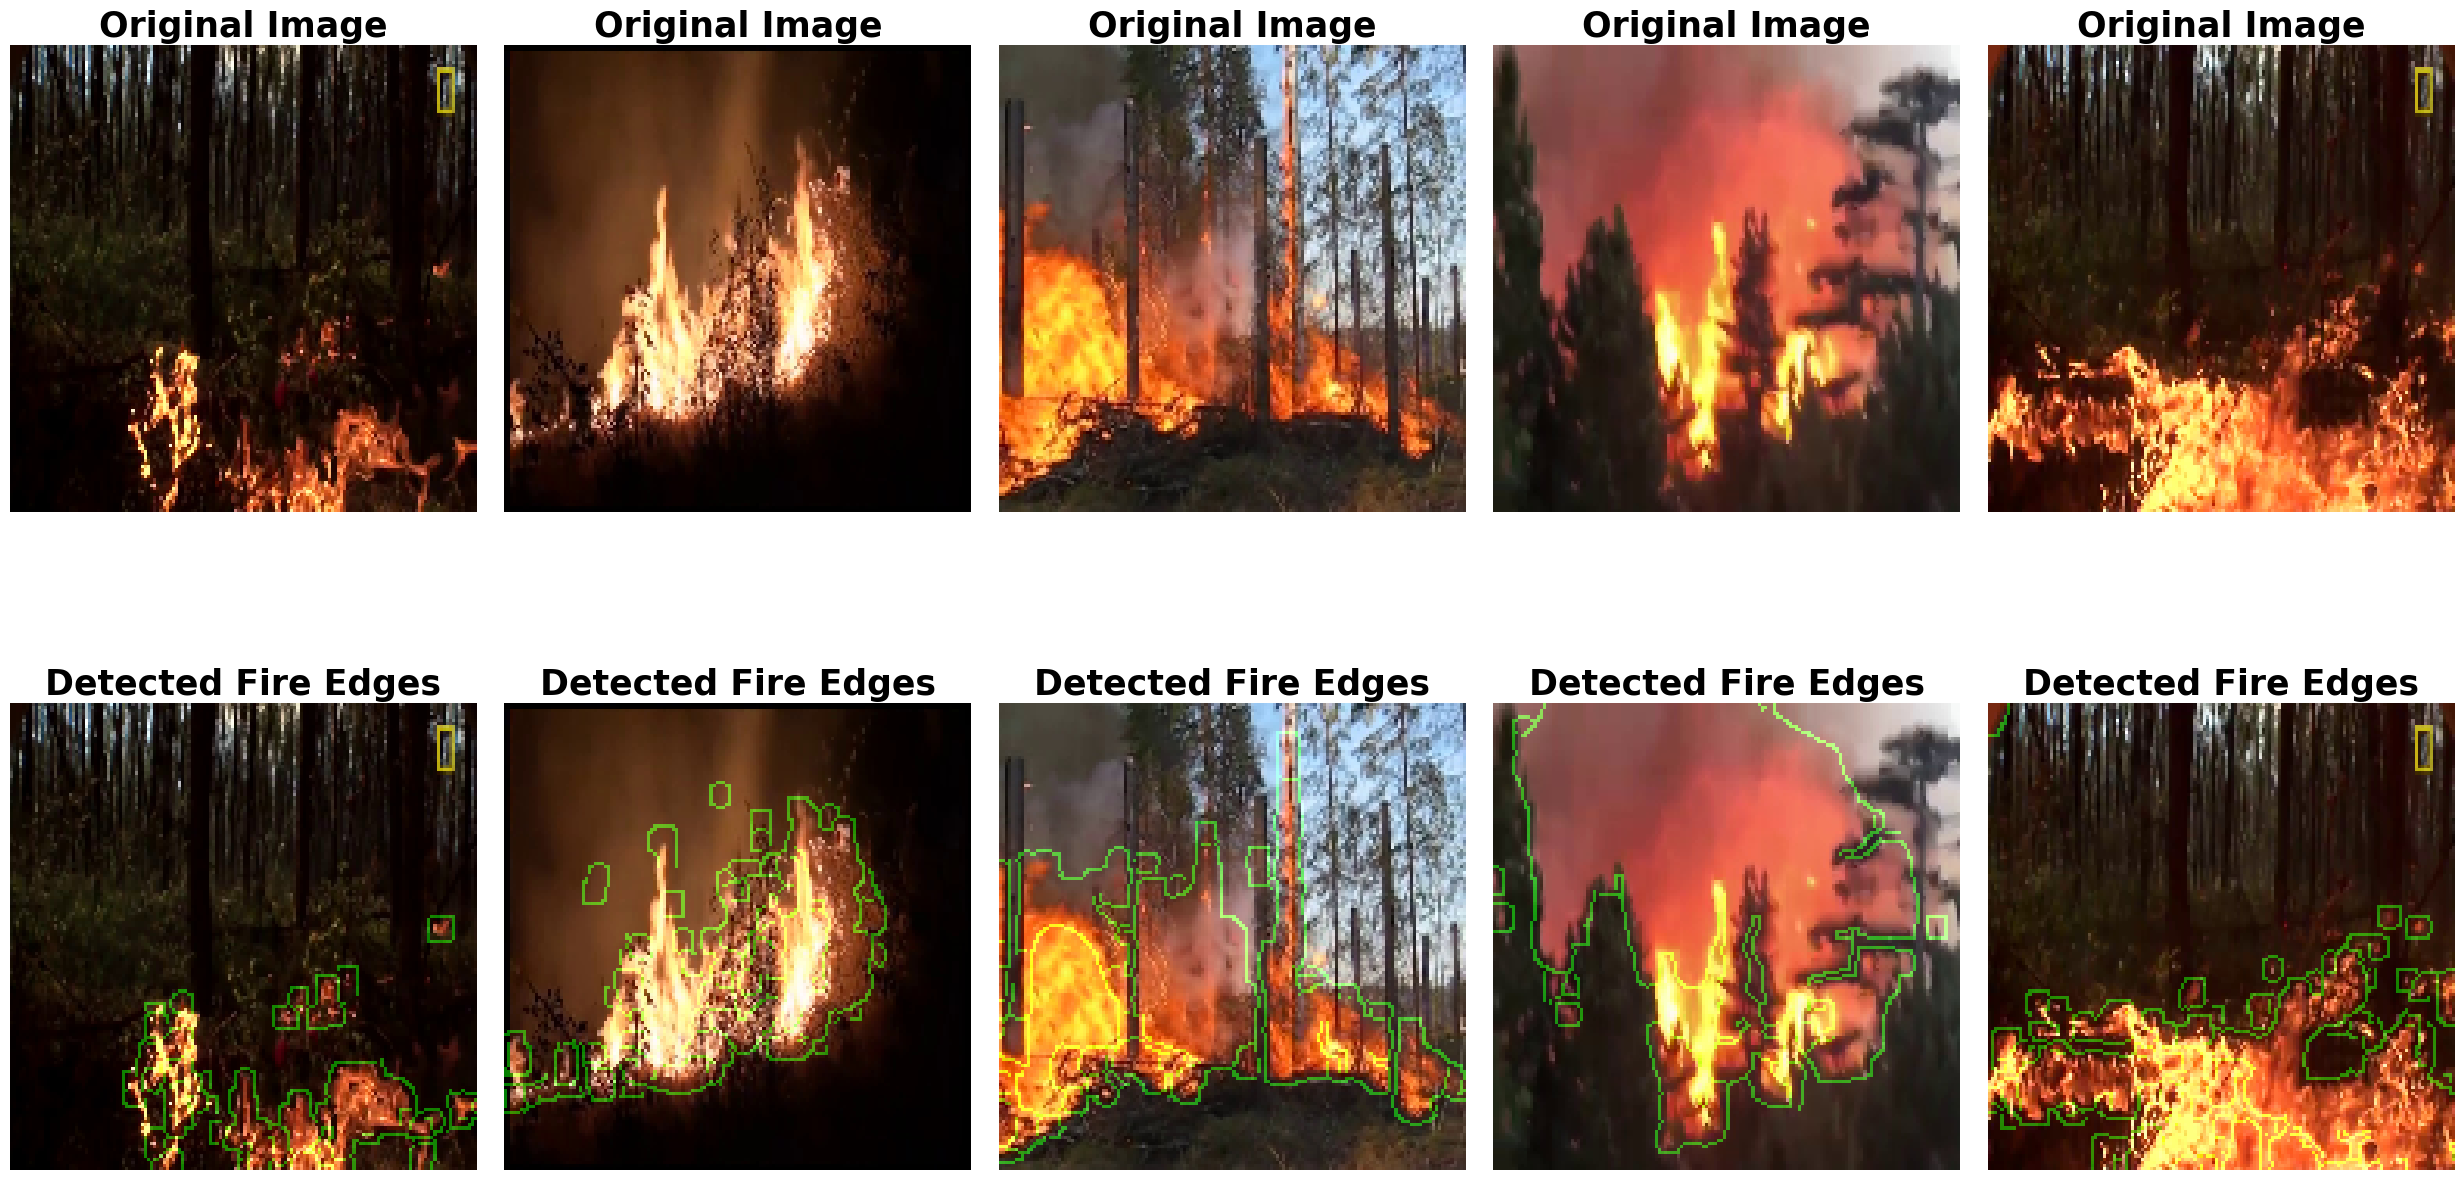

In [40]:
n = 5
plt.figure(figsize=(25, 15))

for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(images[i].astype('uint8'))
    plt.title('Original Image', fontsize=25, fontweight='bold')
    plt.axis('off')
    plt.grid(False)

    plt.subplot(2, n, i + 1 + n)
    plt.imshow(fire_edge_images[i].astype('uint8'), cmap='gray')
    plt.title('Detected Fire Edges', fontsize=25, fontweight='bold')
    plt.axis('off')
    plt.grid(False)

plt.tight_layout(pad=2)
plt.show()

